In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import plotly.express as px
import matplotlib.patches as patches



%matplotlib inline

In [2]:
df = pd.read_json('data.json')
df.head()

,num_sen_placed,num_obs_placed,sen_log,obs_log,match_id,start_time,hero_id,account_id
0,2,4,"[{'time': 609, 'type': 'sen_log', 'key': '[128...","[{'time': -61, 'type': 'obs_log', 'key': '[128...",5766868635,2021-01-01 08:03:02,27,164530809
1,19,13,"[{'time': 91, 'type': 'sen_log', 'key': '[156,...","[{'time': 456, 'type': 'obs_log', 'key': '[142...",5766868635,2021-01-01 08:03:02,87,222189151
2,24,10,"[{'time': 302, 'type': 'sen_log', 'key': '[100...","[{'time': 355, 'type': 'obs_log', 'key': '[100...",5766868635,2021-01-01 08:03:02,85,136421659
3,2,5,"[{'time': -21, 'type': 'sen_log', 'key': '[150...","[{'time': -51, 'type': 'obs_log', 'key': '[156...",5766868635,2021-01-01 08:03:02,86,193884241
4,28,14,"[{'time': 3, 'type': 'sen_log', 'key': '[126, ...","[{'time': 375, 'type': 'obs_log', 'key': '[154...",5766929943,2021-01-01 09:00:23,90,136421659


In [3]:

df['obs_log'][42]

[{'time': 325,
  'type': 'obs_log',
  'key': '[100, 168]',
  'slot': 8,
  'x': 100,
  'y': 168,
  'z': 128,
  'entityleft': False,
  'ehandle': 14370303,
  'player_slot': 131},
 {'time': 583,
  'type': 'obs_log',
  'key': '[106, 110]',
  'slot': 8,
  'x': 106,
  'y': 110,
  'z': 128,
  'entityleft': False,
  'ehandle': 6046951,
  'player_slot': 131},
 {'time': 647,
  'type': 'obs_log',
  'key': '[84, 128]',
  'slot': 8,
  'x': 84,
  'y': 128,
  'z': 128,
  'entityleft': False,
  'ehandle': 8537368,
  'player_slot': 131},
 {'time': 795,
  'type': 'obs_log',
  'key': '[100, 170]',
  'slot': 8,
  'x': 100,
  'y': 170,
  'z': 128,
  'entityleft': False,
  'ehandle': 5702895,
  'player_slot': 131},
 {'time': 960,
  'type': 'obs_log',
  'key': '[114, 90]',
  'slot': 8,
  'x': 114,
  'y': 90,
  'z': 132,
  'entityleft': False,
  'ehandle': 361756,
  'player_slot': 131},
 {'time': 1272,
  'type': 'obs_log',
  'key': '[114, 156]',
  'slot': 8,
  'x': 114,
  'y': 156,
  'z': 130,
  'entityleft':

#####  data needs to be rescaled per https://github.com/odota/core/issues/1473

"Translate the coordinates by subtracting 64 from both x and y, then the range of values is 0-127 starting from the bottom left corner."

In [4]:
#empty array to hold info
sen_log = []

#iterate over every row (not super effective)
for row in df.itertuples(index=False):
    #for every entry in the dict
    for d in row.sen_log:
        #dict to store new rows
        s_log = {}
        s_log['match_id'] = row.match_id #match id not unique
        s_log['start_time'] = row.start_time #record start time
        s_log['hero_id'] = row.hero_id #hero that placed it
        s_log['time'] = d['time'] #time of placement
        s_log['x'] = d['x'] #x coord
        s_log['y'] = d['y'] #y coord
        s_log['z'] = d['z'] #zcoord could be on a hilltop or cliff

        if d['player_slot'] < 128:
            s_log['is_radiant'] = 1
        else:
            s_log['is_radiant'] = 0

        sen_log.append(s_log)
    
df_sentry = pd.DataFrame.from_dict(sen_log)
df_sentry.to_csv('df_sentry.csv', index=False)

df_sentry.head()

,match_id,start_time,hero_id,time,x,y,z,is_radiant
0,5766868635,2021-01-01 08:03:02,27,609,128,126,128,1
1,5766868635,2021-01-01 08:03:02,27,1570,96,132,130,1
2,5766868635,2021-01-01 08:03:02,87,91,156,88,128,1
3,5766868635,2021-01-01 08:03:02,87,338,128,122,128,1
4,5766868635,2021-01-01 08:03:02,87,620,128,138,128,1


In [5]:
df_sentry.shape

(273714, 8)

In [6]:
#empty array to hold info
obs_log = []

#iterate over every row (not super effective)
for row in df.itertuples(index=False):
    #for every entry in the dict
    for d in row.obs_log:
        #dict to store new rows
        o_log = {}
        o_log['match_id'] = row.match_id #match id not unique
        o_log['start_time'] = row.start_time #record start time
        o_log['hero_id'] = row.hero_id #hero that placed it
        o_log['time'] = d['time'] #time of placement
        o_log['x'] = d['x'] #x coord
        o_log['y'] = d['y']
        o_log['z'] = d['z']

        if d['player_slot'] < 128:
            o_log['is_radiant'] = 1
        else:
            o_log['is_radiant'] = 0

        obs_log.append(o_log)
    
df_obs = pd.DataFrame.from_dict(obs_log)
df_obs.to_csv('df_obs.csv', index=False)

df_obs.head()

,match_id,start_time,hero_id,time,x,y,z,is_radiant
0,5766868635,2021-01-01 08:03:02,27,-61,128,126,128,1
1,5766868635,2021-01-01 08:03:02,27,39,92,164,128,1
2,5766868635,2021-01-01 08:03:02,27,274,114,128,128,1
3,5766868635,2021-01-01 08:03:02,27,282,110,154,130,1
4,5766868635,2021-01-01 08:03:02,87,456,142,136,128,1


In [7]:
df_obs.shape

(172884, 8)

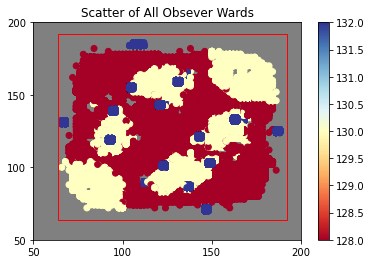

In [28]:
cm = plt.cm.get_cmap('RdYlBu')

# Create figure and axes
fig, ax = plt.subplots()

#very messy but fun to look at
sc = ax.scatter(df_obs['x'],
           df_obs['y'], 
           c = df_obs['z'],
           cmap=cm)

plt.title("Scatter of All Obsever Wards")
plt.xticks(np.arange(50, 250, 50))
plt.yticks(np.arange(50, 250, 50))

#draw bounding rectangle
rect = patches.Rectangle((64, 64), 128, 128, linewidth=1, edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
#add the color bar
plt.colorbar(sc)
#
ax.set_facecolor('grey')


plt.savefig("plots/scatter_all_data.png")


plt.show()

In [9]:
# fig = px.scatter_3d(df_obs, x='x', y='y', z='z',
#               color='z')
# fig.show()